In [1]:
import os
print(os.getcwd())


print(os.listdir())

c:\Users\sfund\OneDrive\Desktop\MLG382
['EmanuelPhiriMLG382Project.ipynb']


## 1. Problem Statement
BrightPath Academy is committed to ensuring that each student reaches their full potential. However, the school faces challenges in early identification of at-risk students and understanding how different factors impact academic performance.

**Research Questions:**
- Can we predict students' grade classes based on demographics, study habits, parental involvement, and extracurricular activities?
- What are the key predictors of academic performance?
- How do extracurricular activities and parental support influence GPA and GradeClass?

## 2. Hypothesis Generation
Based on the research questions, we propose the following hypotheses:
- H1: More study time per week leads to higher academic performance.
- H2: Participation in extracurricular activities is positively associated with GPA.
- H3: Greater parental support results in better grades.
- H4: A high number of absences negatively impacts GPA.
- H5: Students who receive tutoring perform better than those who do not.

## 3.Getting the System Ready and Loading the Data

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Student_performance_data .csv")

df.info()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## 4.Understanding the data 

In [ ]:
# An overview of the Dataset
df.info()

# Summary of the statistics
df.describe()

# Checking for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [16]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


## 5.Exploratory Data Analysis (Univariate): 

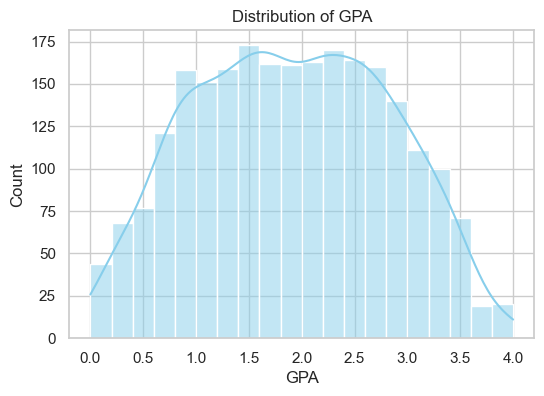

C:\Users\sfund\AppData\Local\Temp\ipykernel_25524\4241762945.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GradeClass', data=df, palette="muted")


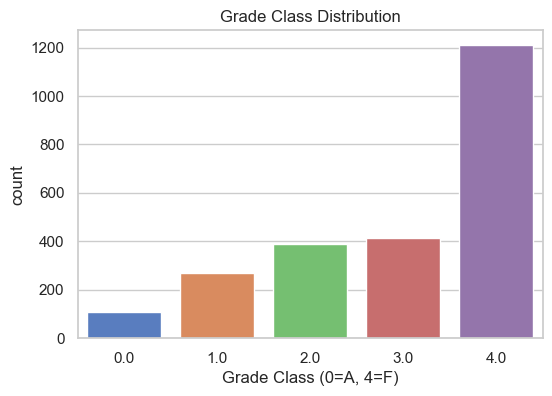

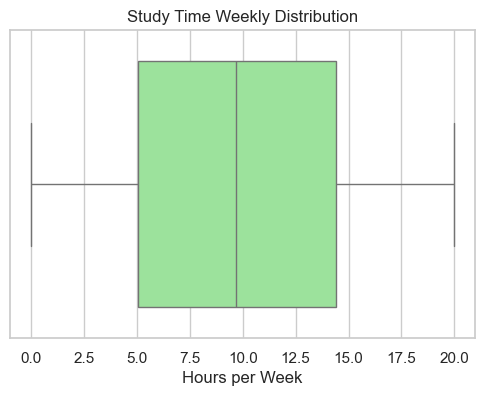

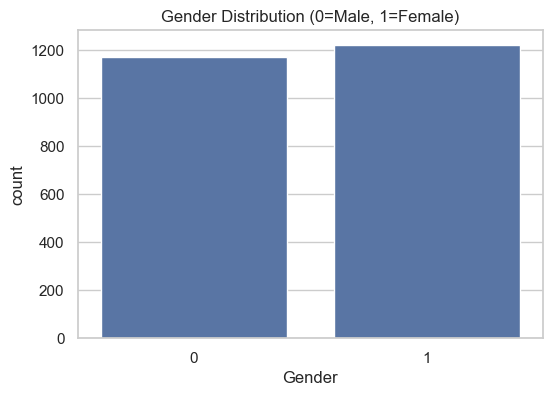

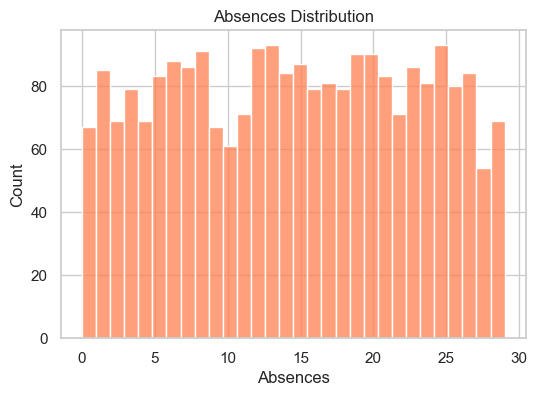

In [19]:
# Set visual style
sns.set(style="whitegrid")


# GPA distribution
plt.figure(figsize=(6,4))
sns.histplot(df['GPA'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of GPA")
plt.xlabel("GPA")
plt.show()

# GradeClass count
plt.figure(figsize=(6,4))
sns.countplot(x='GradeClass', data=df, palette="muted")
plt.title("Grade Class Distribution")
plt.xlabel("Grade Class (0=A, 4=F)")
plt.show()

# Study Time Weekly
plt.figure(figsize=(6,4))
sns.boxplot(x=df['StudyTimeWeekly'], color="lightgreen")
plt.title("Study Time Weekly Distribution")
plt.xlabel("Hours per Week")
plt.show()

# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution (0=Male, 1=Female)")
plt.show()

# Absences Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Absences'], bins=30, color='coral')
plt.title("Absences Distribution")
plt.show()